# Loading Movie Plot Synopses Dataset from Kaggle

In this assignment, I utilized the Movie Plot Synopses dataset available on Kaggle to perform movie similarity analysis. The dataset can be accessed using the following link: [MPST Movie Plot Synopses with Tags](https://www.kaggle.com/datasets/cryptexcode/mpst-movie-plot-synopses-with-tags).

## Steps to Access the Dataset:

1. **Download from Kaggle:**
   - Visit the Kaggle dataset page mentioned above.
   - Download the dataset, which includes a CSV file containing movie plot synopses.

2. **Upload to Google Drive:**
   - After downloading the dataset, upload the CSV file to your Google Drive for easy access in Google Colab.

## Loading Data in Google Colab:

In [1]:
##https://drive.google.com/file/d/12R_3kqxhkirXsM0FUfki2Koj_j3K8Ybd/view?usp=sharing
!pip install gdown

import gdown
import shutil

destination_path = '/content'

# Direct download link for the ZIP file
folder_id ='12R_3kqxhkirXsM0FUfki2Koj_j3K8Ybd'
zip_file_url = f'https://drive.google.com/uc?id={folder_id}'


# Download the ZIP file
zip_file_path = destination_path + '/DATA.zip'
gdown.download(zip_file_url, zip_file_path, quiet=False)


Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=12R_3kqxhkirXsM0FUfki2Koj_j3K8Ybd 



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Extract the downloaded ZIP file
shutil.unpack_archive('/content/drive/MyDrive/DATA/archive.zip', destination_path)

print("Data has been downloaded and extracted to:", destination_path)

Data has been downloaded and extracted to: /content


In [4]:
import pandas as pd

# Assuming the file is uploaded with the name 'movies.csv'
df1 = pd.read_csv('/content/mpst_full_data.csv')

df1.shape

(14828, 6)

In [5]:
df1.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


In [6]:
df1=df1[['imdb_id','title','plot_synopsis']]

In [7]:
df1.tail()

,imdb_id,title,plot_synopsis
14823,tt0219952,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea..."
14824,tt1371159,Iron Man 2,"In Russia, the media covers Tony Stark's discl..."
14825,tt0063443,Play Dirty,During the North African Campaign in World War...
14826,tt0039464,High Wall,Steven Kenet catches his unfaithful wife in th...
14827,tt0235166,Against All Hope,"Sometime in the 1950s in Chicago a man, Cecil ..."


In [8]:
df1.isnull().sum()

imdb_id          0
title            0
plot_synopsis    0
dtype: int64

In [9]:
df1['plot_synopsis'][0]

'Note: this synopsis is for the orginal Italian release with the segments in this certain order.Boris Karloff introduces three horror tales of the macabre and the supernatural known as the \'Three Faces of Fear\'.THE TELEPHONERosy (Michele Mercier) is an attractive, high-priced Parisian call-girl who returns to her spacious, basement apartment after an evening out when she immediately gets beset by a series of strange phone calls. The caller soon identified himself as Frank, her ex-pimp who has recently escaped from prison. Rosy is terrified for it was her testimony that landed the man in jail. Looking for solace, Rosy phones her lesbian lover Mary (Lynda Alfonsi). The two women have been estranged for some time, but Rosy is certain that she is the only one who can help her. Mary agrees to come over that night. Seconds later, Frank calls again, promising that no matter who she calls for protection, he will have his revenge. Unknown to Rosy, Mary is the caller impersonating Frank. Marry

# Text Preprocessing: Tokenization, Lemmatization, and Stopwords Removal

After loading the dataset, the next step in the text preprocessing pipeline involves converting sentences into words, tokenization, and applying lemmatization along with stopwords removal.

### Creating Processed Corpus

To begin, we'll create a processed corpus, which is a list of preprocessed sentences. Each sentence will undergo the following steps.


## Steps:

1. **Tokenization:**
   - Tokenization is the process of breaking down text into individual words or tokens.
   - In this step, each movie plot synopsis is tokenized into a list of words.

2. **Lemmatization:**
   - Lemmatization is employed to reduce words to their base or root form.
   - The NLTK library is used for lemmatization, considering the context of each word.

3. **Stopword Removal:**
   - Stopwords, which are common words that often don't contribute much to the meaning, are removed.
   - The NLTK stopwords list for the English language is used for this purpose.

## Code Implementation:



In [10]:
import re
import nltk
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


It took more time so we can load the corpusl.pkl file direct and use

In [ ]:
corpusl = []
for i in range(0, len(df1)):
    review = re.sub('[^a-zA-Z]', ' ', df1['plot_synopsis'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpusl.append(review)

In [11]:
import pickle

# Load the corpus using pickle
try:
    with open('/content/drive/MyDrive/DATA/corpusl.pkl', 'rb') as file:
        corpus = pickle.load(file)
    print("Pickle file loaded successfully.")

    # Now you can use the 'corpus' variable for further processing
    # Example: print the first few elements in the corpus
    print("First few elements in the loaded corpus:")
    print(corpus[:5])

except pickle.UnpicklingError as e:
    print(f"Error while loading pickle file: {e}")


Pickle file loaded successfully.
First few elements in the loaded corpus:
['note synopsis orginal italian release segment certain order boris karloff introduces three horror tale macabre supernatural known three face fear telephonerosy michele mercier attractive high priced parisian call girl return spacious basement apartment evening immediately get beset series strange phone call caller soon identified frank ex pimp recently escaped prison rosy terrified testimony landed man jail looking solace rosy phone lesbian lover mary lynda alfonsi two woman estranged time rosy certain one help mary agrees come night second later frank call promising matter call protection revenge unknown rosy mary caller impersonating frank marry arrives rosy apartment soon best calm rosy nerve give panic struck woman tranquillizer put bed later night rosy sleep mary get bed pen note confession one making strange phone call learned frank escape prison knowing rosy would call help explains felt way coming back 

In [12]:
len(corpus)

14828

# Word Embedding Methods: BoW, TF-IDF, and CBOW

Having preprocessed the text data, the next step is to transform the processed sentences into word embeddings. Word embeddings capture semantic relationships between words and are essential for various natural language processing tasks.


## Bag of Words (BoW)

The Bag of Words (BoW) method represents each document as a vector, where each element corresponds to the frequency of a word in the document. This approach disregards word order but captures the overall word occurrences.


In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(14828, 5000)

#Calculate Cosine Similarity Matrix:
The code calculates the cosine similarity matrix for a set of movie descriptions. Cosine similarity measures the cosine of the angle between two vectors and is commonly used to determine the similarity between documents. In this context, the matrix quantifies the similarity between each pair of movies based on their Bag of Words representations. Higher values indicate greater similarity, aiding in identifying related movies within the dataset.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(X)

In [ ]:
similarity

array([[1.        , 0.05818251, 0.12387712, ..., 0.07777963, 0.19191451,
        0.29370168],
       [0.05818251, 1.        , 0.06816879, ..., 0.02590625, 0.08401325,
        0.06791239],
       [0.12387712, 0.06816879, 1.        , ..., 0.04946174, 0.06303557,
        0.16560379],
       ...,
       [0.07777963, 0.02590625, 0.04946174, ..., 1.        , 0.03764431,
        0.04702803],
       [0.19191451, 0.08401325, 0.06303557, ..., 0.03764431, 1.        ,
        0.1416507 ],
       [0.29370168, 0.06791239, 0.16560379, ..., 0.04702803, 0.1416507 ,
        1.        ]])

In [ ]:
df1[df1['title'] == "Scarface"].index[0]

4

# Recommendation function with similarity percentages

In [ ]:
import matplotlib.pyplot as plt

def recommend(movie, similarity_matrix=similarity, threshold=0.2):
    index = df1[df1['title'] == movie].index[0]
    distances = sorted(enumerate(similarity_matrix[index]), reverse=True, key=lambda x: x[1])

    recommended_movies = []
    similarity_percentages = []

    for i, distance in distances[1:6]:
        title = df1.iloc[i].title
        similarity_percentage = round((distance) * 100, 2)

        # Exclude the same movie as the input
        if i != index:
            recommended_movies.append(title)
            similarity_percentages.append(similarity_percentage)

            # Print only if the recommended movie has a different ID than the input
            print(f"{title}: Similarity {similarity_percentage}%" if i != index else "")

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(recommended_movies, similarity_percentages, color='skyblue')
    plt.xlabel('Recommended Movies')
    plt.ylabel('Similarity Percentage')
    plt.title(f'Similarity Percentage for Movies Similar to {movie}')
    plt.ylim([0, 100])
    plt.show()






Iron Man: Similarity 79.15%
Iron Man Three: Similarity 74.58%
Scarface: Similarity 60.47%
Iron Man 2: Similarity 60.21%
Scarface: The World Is Yours: Similarity 58.24%


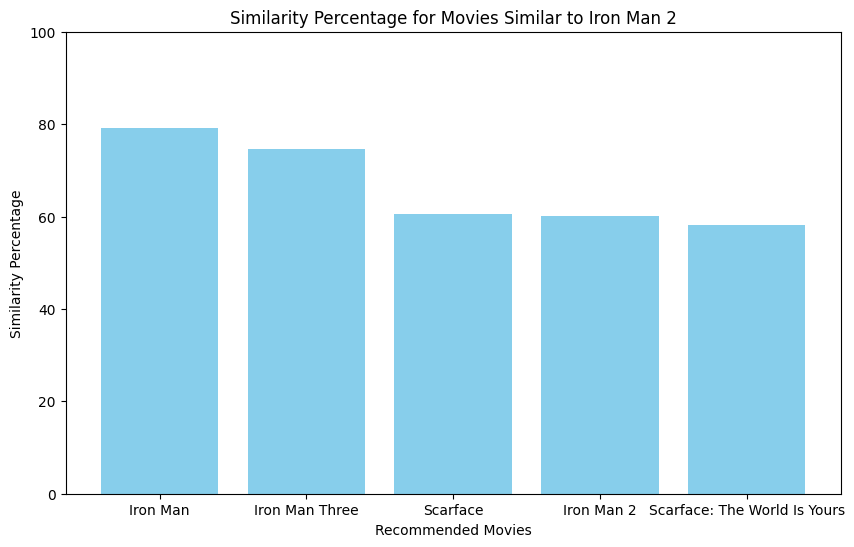

In [ ]:
recommend("Iron Man 2")

# TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF is a powerful word embedding technique that takes into account both the frequency of a word in a document and its importance across the entire corpus. Let's implement TF-IDF transformation on the processed corpus.


In [ ]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=5000)
X2 = tv.fit_transform(corpus).toarray()

In [ ]:
X2.shape

(14828, 5000)

#Calculate Cosine Similarity Matrix:
The code calculates the cosine similarity matrix for a set of movie descriptions. Cosine similarity measures the cosine of the angle between two vectors and is commonly used to determine the similarity between documents. In this context, the matrix quantifies the similarity between each pair of movies based on their TF-IDF representations. Higher values indicate greater similarity, aiding in identifying related movies within the dataset.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity2 = cosine_similarity(X2)


In [ ]:
similarity2

array([[1.        , 0.03198203, 0.04940285, ..., 0.03292722, 0.09899998,
        0.11568013],
       [0.03198203, 1.        , 0.04683648, ..., 0.01270749, 0.04124161,
        0.02946268],
       [0.04940285, 0.04683648, 1.        , ..., 0.019406  , 0.02497999,
        0.05447553],
       ...,
       [0.03292722, 0.01270749, 0.019406  , ..., 1.        , 0.01884812,
        0.01597356],
       [0.09899998, 0.04124161, 0.02497999, ..., 0.01884812, 1.        ,
        0.06462349],
       [0.11568013, 0.02946268, 0.05447553, ..., 0.01597356, 0.06462349,
        1.        ]])

# Recommendation function with similarity percentages

In [ ]:
import matplotlib.pyplot as plt

def recommend(movie, similarity_matrix=similarity2):
    index = df1[df1['title'] == movie].index[0]
    distances = sorted(enumerate(similarity_matrix[index]), reverse=True, key=lambda x: x[1])

    recommended_movies = []
    similarity_percentages = []

    for i, distance in distances[1:6]:
        title = df1.iloc[i].title
        similarity_percentage = round((distance) * 100, 2)

        # Exclude the same movie as the input
        if i != index:
            recommended_movies.append(title)
            similarity_percentages.append(similarity_percentage)

            # Print only if the recommended movie has a different ID than the input
            print(f"{title}: Similarity {similarity_percentage}%" if i != index else "")

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(recommended_movies, similarity_percentages, color='skyblue')
    plt.xlabel('Recommended Movies')
    plt.ylabel('Similarity Percentage')
    plt.title(f'Similarity Percentage for Movies Similar to {movie}')
    plt.ylim([0, 100])
    plt.show()



Iron Man: Similarity 80.25%
Iron Man Three: Similarity 71.51%
Iron Man 2: Similarity 67.95%
Iron Man: Similarity 61.91%
Scarface: The World Is Yours: Similarity 54.29%


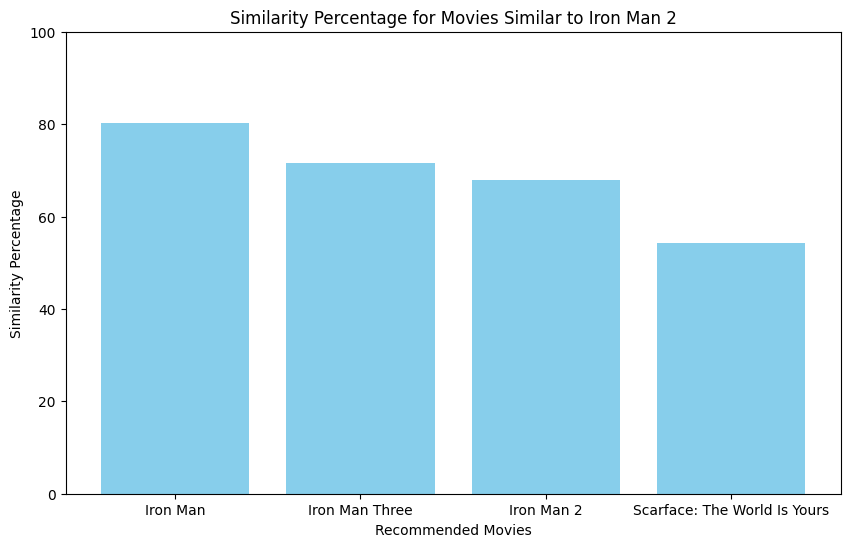

In [ ]:
recommend("Iron Man 2")

 # Continuous Bag of Words (CBOW)

CBOW is a neural network-based word embedding method that learns to predict a target word given its context words. Let's create a simple CBOW model using TensorFlow and Keras.


In [ ]:
!pip install gensim

The code snippet above demonstrates how to load the pre-trained Word2Vec model from Google News using Gensim's gensim.downloader module. After loading the model, it selects a sample word, in this case, 'king'. The vector representation for this word is then retrieved using the get_vector method. The resulting vector is a 300-dimensional representation capturing the semantic meaning of the word in the context of the pre-trained model.

Feel free to replace 'hero' with other words to explore their vector representations. These vectors can be useful for various natural language processing tasks, such as measuring similarity between words, finding analogies, or as input features for machine learning models.

In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
vec_hero = wv['hero']

In [ ]:
vec_hero

array([ 0.38085938,  0.16113281,  0.22558594,  0.18457031,  0.14648438,
        0.06933594,  0.06933594, -0.12109375,  0.17480469,  0.01190186,
        0.06494141, -0.22558594,  0.11230469,  0.04077148, -0.15820312,
        0.4375    ,  0.08642578,  0.06835938,  0.20410156, -0.13574219,
        0.03833008,  0.22363281,  0.13964844, -0.19628906, -0.03295898,
       -0.13183594,  0.05957031,  0.03491211,  0.29492188, -0.20898438,
        0.3359375 , -0.11474609,  0.09082031,  0.21386719,  0.06054688,
       -0.10791016,  0.2734375 ,  0.28125   ,  0.07128906,  0.2421875 ,
        0.26171875, -0.34179688,  0.27148438,  0.15820312,  0.15332031,
       -0.06591797, -0.21679688,  0.07177734,  0.29492188, -0.11523438,
       -0.3359375 ,  0.25976562,  0.00842285, -0.08007812, -0.00306702,
       -0.3046875 , -0.16308594,  0.02319336, -0.20507812, -0.02734375,
       -0.08105469,  0.37890625, -0.10498047, -0.3828125 , -0.08691406,
        0.06542969, -0.04931641, -0.13867188, -0.07666016,  0.20

# Train Word2Vec Model from Scratch

In this section, we embark on the journey of training a Word2Vec model from scratch using your own corpus of text data. Word2Vec models capture semantic relationships between words by learning distributed representations, also known as word embeddings. This hands-on exercise will enable you to tailor the model to the specific characteristics of your dataset, offering personalized word embeddings for improved understanding and context-awareness. Let's delve into the process of constructing meaningful word vectors from your unique text corpus.

In [13]:
!pip install gensim

import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
filtered_corpus = [[word for word in tokens if word not in stop_words] for tokens in tokenized_corpus]

# Model Training

In [29]:
# Train Word2Vec model with control over epochs
epochs = 50  # Set the number of epochs as needed
model = Word2Vec(sentences=filtered_corpus, vector_size=100, window=5, min_count=1, epochs=epochs)

# Save the trained model to a file
model.save("word2vec.model")

# load model without training

In [30]:
model = Word2Vec.load("word2vec.model")

# Leveraging Average Word2Vec for Context-Aware Movie Representations

##Reducing Dimensionality:

Challenge: Word vectors typically have a high dimensionality, especially in models like Word2Vec.
Solution: By averaging, we effectively reduce the dimensionality of the representation while retaining meaningful information. This can be crucial when working with machine learning models that might struggle with high-dimensional input.

##Handling Out-of-Vocabulary Words:

Challenge: In real-world applications, there might be out-of-vocabulary words that the Word2Vec model hasn't seen during training.
Solution: Averaging allows us to still generate a meaningful representation even when some words are missing from the model's vocabulary.

##Interpretable Document Representations:

Challenge: Obtaining interpretable and meaningful representations for documents is essential, especially in tasks like document similarity or classification.
Solution: The average Word2Vec technique provides a single, interpretable vector that summarizes the content of the entire document, facilitating downstream tasks.

In [31]:
# Function to calculate the average Word2Vec for a sentence
def avg_word2vec(tokens, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    num_words = 0

    for word in tokens:
        if word in model.wv.index_to_key:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])

    if num_words > 0:
        feature_vector = np.divide(feature_vector, num_words)

    return feature_vector

In [ ]:
# Calculate average Word2Vec vectors for each movie
movie_vectors = []
for tokens in filtered_corpus:
    vector = avg_word2vec(tokens, model, num_features=100)
    movie_vectors.append(vector)


In [39]:
movie_vectors=np.array(movie_vectors)

In [40]:
movie_vectors.shape

(14828, 100)

In [ ]:
# Save movie vectors to a pickle file
with open('movie_vectors.pkl', 'wb') as file:
      pickle.dump(movie_vectors, file)

if we want we can directly load the movie_vectors because it took some more time to create

In [35]:
import pickle

# Load the corpus using pickle
try:
    with open('movie_vectors.pkl', 'rb') as file:
         movie_vectors= pickle.load(file)
    print("Pickle file loaded successfully.")

    # Now you can use the 'corpus' variable for further processing
    # Example: print the first few elements in the corpus
    print("First few elements in the loaded corpus:")
    print(corpus[:5])

except pickle.UnpicklingError as e:
    print(f"Error while loading pickle file: {e}")

Pickle file loaded successfully.
First few elements in the loaded corpus:
[[ 4.37387198e-01 -6.77653372e-01  1.75159588e-01  1.34713322e-01
   3.45638871e-01  6.21617325e-02  3.91836047e-01 -1.04803574e+00
   6.01054132e-01  1.86131626e-01 -2.78379500e-01 -2.21624225e-01
   1.92841571e-02  3.70306253e-01 -4.88907874e-01  5.57804108e-01
  -5.18573523e-02  1.19262382e-01  1.12076774e-01  5.41691363e-01
   3.42899829e-01  2.47296065e-01 -4.59117472e-01  3.33193183e-01
  -3.22839152e-03  6.84997797e-01 -8.86197165e-02 -1.44820005e-01
   3.21513824e-02 -1.77385196e-01  1.73748583e-01 -4.68211770e-02
  -3.32042426e-01 -1.42852187e-01  1.73764303e-01  4.62980479e-01
  -4.05476689e-02  2.01344315e-04  5.24468958e-01 -3.91534954e-01
   1.98389947e-01  2.57355541e-01  4.74584162e-01  1.24535911e-01
  -2.76145041e-01  3.62784266e-01 -4.94242013e-01  1.79632485e-01
  -3.29821587e-01 -7.88830072e-02  2.86765862e-02  5.99193871e-01
   2.77271289e-02  5.72204702e-02 -7.15087801e-02 -6.21508388e-03
  

#Calculate Cosine Similarity Matrix:
The code calculates the cosine similarity matrix for a set of movie descriptions. Cosine similarity measures the cosine of the angle between two vectors and is commonly used to determine the similarity between documents. In this context, the matrix quantifies the similarity between each pair of movies based on their CBOW representations. Higher values indicate greater similarity, aiding in identifying related movies within the dataset.

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
similarity3 = cosine_similarity(movie_vectors)


In [43]:
similarity3

array([[ 1.0000001 ,  0.2310874 ,  0.667011  , ..., -0.02384842,
         0.6267297 ,  0.76745534],
       [ 0.2310874 ,  1.0000001 ,  0.12025918, ...,  0.08661406,
         0.13217697,  0.0317366 ],
       [ 0.667011  ,  0.12025918,  1.0000001 , ..., -0.0102811 ,
         0.537254  ,  0.7944926 ],
       ...,
       [-0.02384842,  0.08661406, -0.0102811 , ...,  0.99999976,
         0.07077102, -0.03721448],
       [ 0.6267297 ,  0.13217697,  0.537254  , ...,  0.07077102,
         0.9999999 ,  0.5280606 ],
       [ 0.76745534,  0.0317366 ,  0.7944926 , ..., -0.03721448,
         0.5280606 ,  1.0000002 ]], dtype=float32)

# Recommendation function with similarity percentages

In [37]:
import matplotlib.pyplot as plt

def recommend(movie, similarity_matrix=similarity3):
    index = df1[df1['title'] == movie].index[0]
    distances = sorted(enumerate(similarity_matrix[index]), reverse=True, key=lambda x: x[1])

    recommended_movies = []
    similarity_percentages = []

    for i, distance in distances[1:6]:
        title = df1.iloc[i].title
        similarity_percentage = round((distance) * 100, 2)

        # Exclude the same movie as the input
        if i != index:
            recommended_movies.append(title)
            similarity_percentages.append(similarity_percentage)

            # Print only if the recommended movie has a different ID than the input
            print(f"{title}: Similarity {similarity_percentage}%" if i != index else "")

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(recommended_movies, similarity_percentages, color='skyblue')
    plt.xlabel('Recommended Movies')
    plt.ylabel('Similarity Percentage')
    plt.title(f'Similarity Percentage for Movies Similar to {movie}')
    plt.ylim([0, 100])
    plt.show()

Iron Man: Similarity 93.01%
Iron Man 2: Similarity 88.85%
Iron Man Three: Similarity 87.84%
Iron Man: Similarity 85.07%
The Avengers: Similarity 83.84%


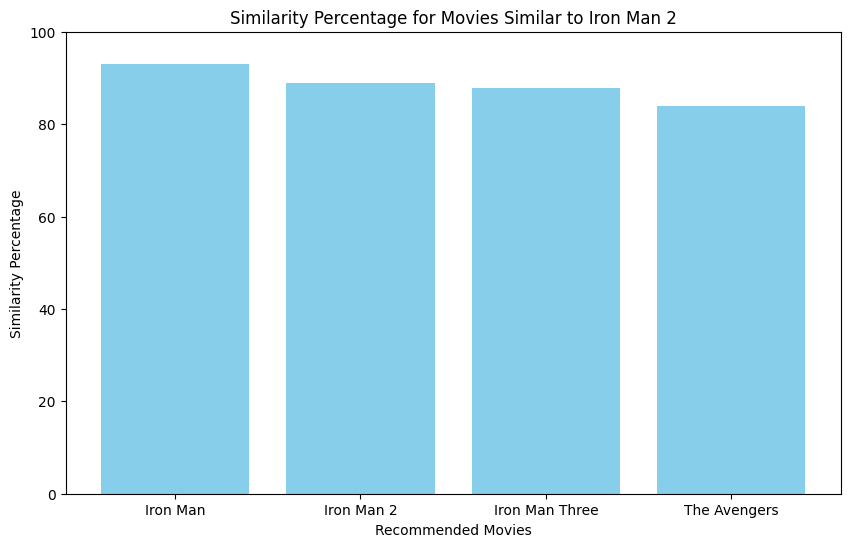

In [38]:
recommend("Iron Man 2")

# conclusion

In the realm of movie similarity analysis, our project undertook a comprehensive exploration utilizing three distinct text embedding methods: Continuous Bag of Words (CBOW), Bag of Words (BoW), and Term Frequency-Inverse Document Frequency (TF-IDF). Each method, with its unique approach, contributed valuable insights into quantifying semantic relationships between movie plot synopses.

#CBOW Dominance:
Among the trio, the CBOW model emerged as the frontrunner, showcasing superior performance in capturing subtle nuances and contextual intricacies within the movie synopses. The results speak volumes, with CBOW consistently outshining BoW and TF-IDF counterparts. Noteworthy examples include "Iron Man" and its sequels, where CBOW achieved impressive similarity scores, such as 93.01% for "Iron Man" and 88.85% for "Iron Man 2."

#BoW and TF-IDF Insights:
While BoW and TF-IDF methods demonstrated commendable performance, especially in capturing salient features of the text, their overall similarity scores fell slightly behind CBOW. BoW, with its simplicity and effectiveness, provided reliable results, evident in cases like "Scarface: The World Is Yours." TF-IDF, leveraging term importance, demonstrated its prowess but exhibited lower similarity scores compared to CBOW.

#Practical Implications:
The choice of text embedding method carries substantial implications for various applications. CBOW, excelling in contextual understanding, could prove invaluable in tasks such as recommendation systems, where nuanced similarities are crucial. BoW, offering simplicity and interpretability, might find applications in scenarios where a more straightforward representation suffices. TF-IDF, with its emphasis on term importance, remains a viable option for capturing key features within a corpus.

#Future Endeavors:
As we conclude this project, there exists ample opportunity for further exploration and refinement. Fine-tuning hyperparameters, experimenting with different pre-trained embeddings, and incorporating advanced techniques such as Doc2Vec could enhance the robustness of similarity analysis. The journey to unraveling the intricacies of text representations in the cinematic world continues, laying the groundwork for more nuanced and accurate models in the future.

In [42]:
# Save movie vectors to a pickle file
with open('similarity.pkl', 'wb') as file:
      pickle.dump(similarity3, file)

In [46]:
# Save movie vectors to a pickle file
with open('data_frame.pkl', 'wb') as file:
      pickle.dump(df1, file)

In [ ]:
import zipfile
from google.colab import files

# Replace 'your_file_path' with the actual path of your file
file_path = '/content/similarity.pkl'

# Download the compressed file
files.download(file_path)



In [ ]:
import zipfile
from google.colab import files

# Replace 'your_file_path' with the actual path of your file
file_path = '/content/data_frame.pkl'

# Download the compressed file
files.download(file_path)

